In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Importing necessary libraries
import plotly.express as px
import numpy as np

# Read the CSV file into a DataFrame
data = pd.read_csv("demand_inventory.csv")

# Display the first few rows of the DataFrame
print(data.head())

# Dropping the 'Unnamed: 0' column



   Unnamed: 0        Date Product_ID  Demand  Inventory
0           0  2023-06-01         P1      51       5500
1           1  2023-06-02         P1     141       5449
2           2  2023-06-03         P1     172       5308
3           3  2023-06-04         P1      91       5136
4           4  2023-06-05         P1     198       5045


In [2]:
import plotly.graph_objects as go

# Create a custom color palette
color_palette = ['#3366CC']

# Create a figure with Plotly
fig_demand = go.Figure()

# Add a line plot for demand over time
fig_demand.add_trace(go.Scatter(x=data['Date'], y=data['Demand'], mode='lines',
                                line=dict(color=color_palette[0], width=2),
                                name='Demand'))

# Update layout properties for aesthetics
fig_demand.update_layout(title='Demand Over Time',
                          xaxis_title='Date',
                          yaxis_title='Demand',
                          title_font=dict(size=24, family='Arial', color='#333'),
                          xaxis=dict(showgrid=False, linecolor='#333', tickfont=dict(color='#666')),
                          yaxis=dict(showgrid=False, linecolor='#333', tickfont=dict(color='#666')),
                          plot_bgcolor='#f9f9f9',
                          paper_bgcolor='#f9f9f9',
                          font=dict(color='#333'),
                          hovermode='x unified',
                          legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                          margin=dict(l=50, r=50, t=80, b=50),
                          autosize=True,
                          hoverlabel=dict(bgcolor='white', font=dict(color='#333')),
                          showlegend=True)

# Show the plot
fig_demand.show()


In [3]:
import plotly.graph_objects as go

# Create a custom color palette
color_palette = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9C27B0']

# Create a figure with Plotly
fig_inventory = go.Figure()

# Add a line plot for inventory over time
fig_inventory.add_trace(go.Scatter(x=data['Date'], y=data['Inventory'], mode='lines',
                                   line=dict(color=color_palette[0], width=2),
                                   name='Inventory'))

# Update layout properties for aesthetics
fig_inventory.update_layout(title='Inventory Over Time',
                             xaxis_title='Date',
                             yaxis_title='Inventory',
                             title_font=dict(size=24, family='Arial', color='#333'),
                             xaxis=dict(showgrid=False, linecolor='#333', tickfont=dict(color='#666')),
                             yaxis=dict(showgrid=False, linecolor='#333', tickfont=dict(color='#666')),
                             plot_bgcolor='#f9f9f9',
                             paper_bgcolor='#f9f9f9',
                             font=dict(color='#333'),
                             hovermode='x unified',
                             legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                             margin=dict(l=50, r=50, t=80, b=50),
                             autosize=True,
                             hoverlabel=dict(bgcolor='white', font=dict(color='#333')),
                             showlegend=True)

# Show the plot
fig_inventory.show()


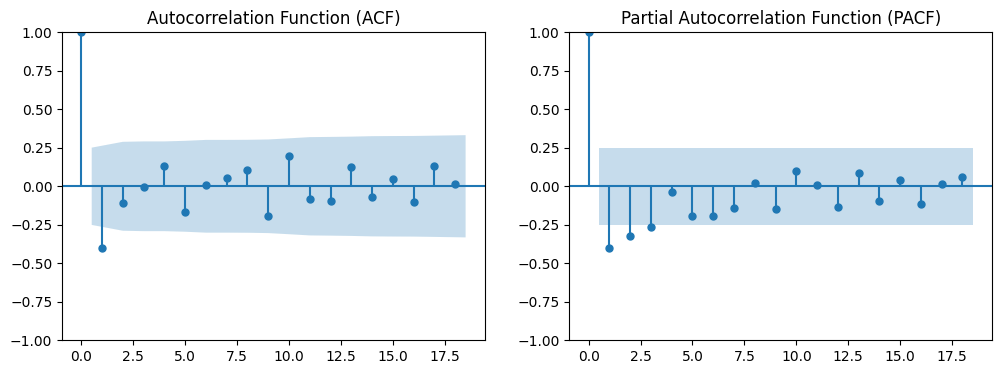

In [4]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Compute the differenced time series
differenced_series = data['Demand'].diff().dropna()

# Compute ACF and PACF of the differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ACF
plot_acf(differenced_series, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(differenced_series, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()



In [7]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Read the CSV file into a DataFrame
data = pd.read_csv("demand_inventory.csv")

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Assuming 'Demand' is the column representing the time series data
time_series = data['Demand']

# Define the SARIMAX model parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 2)  # 2 because the data contains a time period of 2 months only

# Fit SARIMAX model
model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Generate future steps
future_steps = 10

# Make predictions
predictions = model_fit.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)
print(predictions)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



2023-08-02    117
2023-08-03    116
2023-08-04    130
2023-08-05    114
2023-08-06    128
2023-08-07    115
2023-08-08    129
2023-08-09    115
2023-08-10    129
2023-08-11    115
Freq: D, Name: predicted_mean, dtype: int64


In [9]:
# Create date indices for the future predictions
future_dates = pd.date_range(start=time_series.index[-1] + pd.DateOffset(days=1), periods=future_steps, freq='D')

# Create a pandas Series with the predicted values and date indices
forecasted_demand = pd.Series(predictions, index=future_dates)

# Initial inventory level
initial_inventory = 5500

# Lead time (number of days it takes to replenish inventory)
lead_time = 1 # it's different for every business, 1 is an example

# Service level (probability of not stocking out)
service_level = 0.95 # it's different for every business, 0.95 is an example

# Calculate the optimal order quantity using the Newsvendor formula
z = np.abs(np.percentile(forecasted_demand, 100 * (1 - service_level)))
order_quantity = np.ceil(forecasted_demand.mean() + z).astype(int)

# Calculate the reorder point
reorder_point = forecasted_demand.mean() * lead_time + z

# Calculate the optimal safety stock
safety_stock = reorder_point - forecasted_demand.mean() * lead_time

# Calculate the total cost (holding cost + stockout cost)
holding_cost = 0.1  # it's different for every business, 0.1 is an example
stockout_cost = 10  # # it's different for every business, 10 is an example
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity)
total_stockout_cost = stockout_cost * np.maximum(0, forecasted_demand.mean() * lead_time - initial_inventory)

# Calculate the total cost
total_cost = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity)
print("Reorder Point:", reorder_point)
print("Safety Stock:", safety_stock)
print("Total Cost:", total_cost)

Optimal Order Quantity: 236
Reorder Point: 235.25
Safety Stock: 114.45
Total Cost: 561.8000000000001
